In [77]:
import generate_poems as gen_poem
import preprocessing
import metrics
import tensorflow as tf
import importlib as imp
imp.reload(gen_poem)

<module 'generate_poems' from '/gpfs/data/rsingh47/anair27/misc/dl-final/csci1470-final-project-POE-M/code/generate_poems.py'>

In [18]:
corpus, _ = preprocessing.get_corpus()

In [19]:
tokenizer = preprocessing.get_tokenizer(corpus)

In [66]:
SEEDS = [13, 16, 72, 2052, 692]

In [67]:
STARTERS = ["flames", "i go to", "i will eat a", "love is"]

# Model 1: Naive N-Gram

In [47]:
naive_n_gram_model = tf.keras.models.load_model("models/three_architectures/naive_n_gram/model", custom_objects = {"Perplexity": metrics.Perplexity})

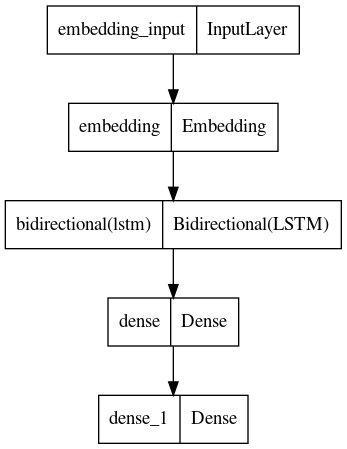

In [48]:
tf.keras.utils.plot_model(naive_n_gram_model)

In [61]:
for starter in STARTERS:
    print("Poems generated with \"" + starter + "\"" + "...")
    print("----------")
    for seed in SEEDS:
        print(gen_poem.generate_poem_naive_n_grams(naive_n_gram_model, tokenizer, starter, seed= seed))
        print("----------")
    print("\n")

Poems generated with "flames"...
----------
flames danced and
ten breathing nothing bounty
enough to fix this
----------
flames through the rain
i see you your head so so
still have dammit
----------
flames so i still
see the words i am in the mind
i have to do
----------
flames danced of
a fight from all the whole page has
been seeing shit where have i
----------
flames in the sun
a new friend the days i have cold
i have all a
----------


Poems generated with "i go with the"...
----------
i go with the roses
lingers august of hidden
of winter soon dim
----------
i go with the end
of a dead that day and yet
you can take its
----------
i go with the wind
and i am in the summer
you love you be winter
----------
i go with the storm
softened off with the pond
a frog back in her
----------
i go with the night
i have a haiku a
haiku i have to
----------


Poems generated with "he will eat a"...
----------
he will eat a demon
came through those moments
penetrated filled
----------
he will ea

# Model 2: Line by Line

In [32]:
lbl_model_1 = tf.keras.models.load_model("models/three_architectures/line_by_line/model_1", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})
lbl_model_2 = tf.keras.models.load_model("models/three_architectures/line_by_line/model_2", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})
lbl_model_3 = tf.keras.models.load_model("models/three_architectures/line_by_line/model_3", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})

In [62]:
for starter in STARTERS:
    print("Poems generated with \"" + starter + "\"" + "...")
    print("----------")
    for seed in SEEDS:
        print(gen_poem.generate_poem_line_by_line(lbl_model_1, lbl_model_2, lbl_model_3, tokenizer, starter, seed = seed))
        print("----------")
    print("\n")

Poems generated with "flames"...
----------
flames danced in
such a steaming pitter patter
on black blood again
----------
flames bright and dancing
black he turns on me high now
they say an empty
----------
flames people to
reveal like me and one day
they probably bother
----------
flames bright and dancing
eventually become grey
eyes modesty then
----------
flames red and and
it the eyes the sky is the new
crack in the stars time to
----------


Poems generated with "i go with the"...
----------
i go with the fringe deep
without held supporting in
another hard wake of
----------
i go with the fringe time home by
he is not gay he hung up
not be not you see you
----------
i go with the cat
the never never a simple looks
your back well have down
----------
i go with the fringe rain
they said is what you up from
no more time can
----------
i go with the heart
the autumn sun is on my
little haiku of
----------


Poems generated with "he will eat a"...
----------
he will eat a flow
relentl

# Model 3: Line by Line with Stops

In [34]:
lbl_s_model_1 = tf.keras.models.load_model("models/three_architectures/line_by_line_with_stops/model_1", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})
lbl_s_model_2 = tf.keras.models.load_model("models/three_architectures/line_by_line_with_stops/model_2", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})
lbl_s_model_3 = tf.keras.models.load_model("models/three_architectures/line_by_line_with_stops/model_3", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})

In [37]:
stop_corpus, _ = preprocessing.get_corpus(new_line_tokens=True)
stop_tokenizer = preprocessing.get_tokenizer(stop_corpus)

In [63]:
for starter in STARTERS:
    print("Poems generated with \"" + starter + "\"" + "...")
    print("----------")
    for seed in SEEDS:
        print(gen_poem.generate_poem_line_by_line_with_stops(lbl_s_model_1, lbl_s_model_2, lbl_s_model_3, stop_tokenizer, starter, seed = seed))
        print("----------")
    print("\n")

Poems generated with "flames"...
----------
flames danced in his eyes 
it snow starts to many litecoin 
and hopes slush to hot girl 
----------
flames bright and dancing 
eventually minutes 
their last flow like and soul 
----------
flames bright and dancing 
eventually minutes 
new life up distracted 
----------
flames bright and dancing 
eventually minutes 
their last flow friends and gone 
----------
flames bright and dancing 
as the night is just an night 
heart of no white day 
----------


Poems generated with "i go with the"...
----------
i go with the fringe 
to see what there is an moment 
will not do yours 
----------
i go with the haze 
the day of the horizon 
it will fuck you yet 
----------
i go with the fight 
to i like a little haiku 
i will never hear 
----------
i go with the fringe 
to see what no more will to say 
dont touch to kill her 
----------
i go with the ice 
she grabbed the back of my head 
and not you i dont love 
----------


Poems generated with "he will 

In [83]:
# CREATE POEM BOOK
def create_poem_book(output):
    with open(output+".md", 'w') as f:
        f.write("# POEM BOOK\n\n\n")
        f.write(f"##### Seeds used: {SEEDS} \n")
        f.write(f"##### Starters used: {STARTERS} \n\n")
        f.write("\n---------------\n")
        f.write("## Model 1: Naive N-Gram\n")
        # f.write("---------------\n")
        for starter in STARTERS:
            f.write("### Poems generated with \"" + starter + "\"" + "...\n")
            #f.write("----------\n")
            for seed in SEEDS:
                f.write(gen_poem.generate_poem_naive_n_grams(naive_n_gram_model, tokenizer, starter, seed= seed, markdown = True))
                f.write("\n\n")
            f.write("\n")
        f.write("\n---------------\n")
        f.write("## Model 2: Line by Line\n")
        # f.write("---------------\n")
        for starter in STARTERS:
            f.write("### Poems generated with \"" + starter + "\"" + "...\n")
            #f.write("----------\n")
            for seed in SEEDS:
                f.write(gen_poem.generate_poem_line_by_line(lbl_model_1, lbl_model_2, lbl_model_3, tokenizer, starter, seed = seed, markdown = True))
                f.write("\n\n")
            f.write("\n")
        f.write("\n---------------\n")
        f.write("## Model 3: Line by Line with stops\n")
        for starter in STARTERS:
            f.write("### Poems generated with \"" + starter + "\"" + "...\n")
            # f.write("----------\n")
            for seed in SEEDS:
                f.write(gen_poem.generate_poem_line_by_line_with_stops(lbl_s_model_1, lbl_s_model_2, lbl_s_model_3, stop_tokenizer, starter, seed = seed, markdown = True))
                f.write("\n\n")
            f.write("\n")

In [85]:
SEEDS = [65, 13, 55]
STARTERS = ["flames", "i will go to the", "sing a", "misty mountain"]

In [86]:
create_poem_book("poem_book")

In [63]:
def plot_convergence(history1, history2, history3):
    history1 = history1.history
    history2 = history2.history
    history3 = history3.history
    f, ax = plt.subplots(nrows= 3, ncols = 2, figsize = (10, 6))
    ax[0,0].set(title="Accuracy")
    ax[0,1].set(title="Perplexity")
    sns.lineplot(history1["accuracy"],ax=ax[0,0])
    sns.lineplot(history1["Perplexity"],ax=ax[0,1])
    sns.lineplot(history2["accuracy"],ax=ax[1,0])
    sns.lineplot(history2["Perplexity"],ax=ax[1,1])
    sns.lineplot(history3["accuracy"],ax=ax[2,0])
    sns.lineplot(history3["Perplexity"],ax=ax[2,1])

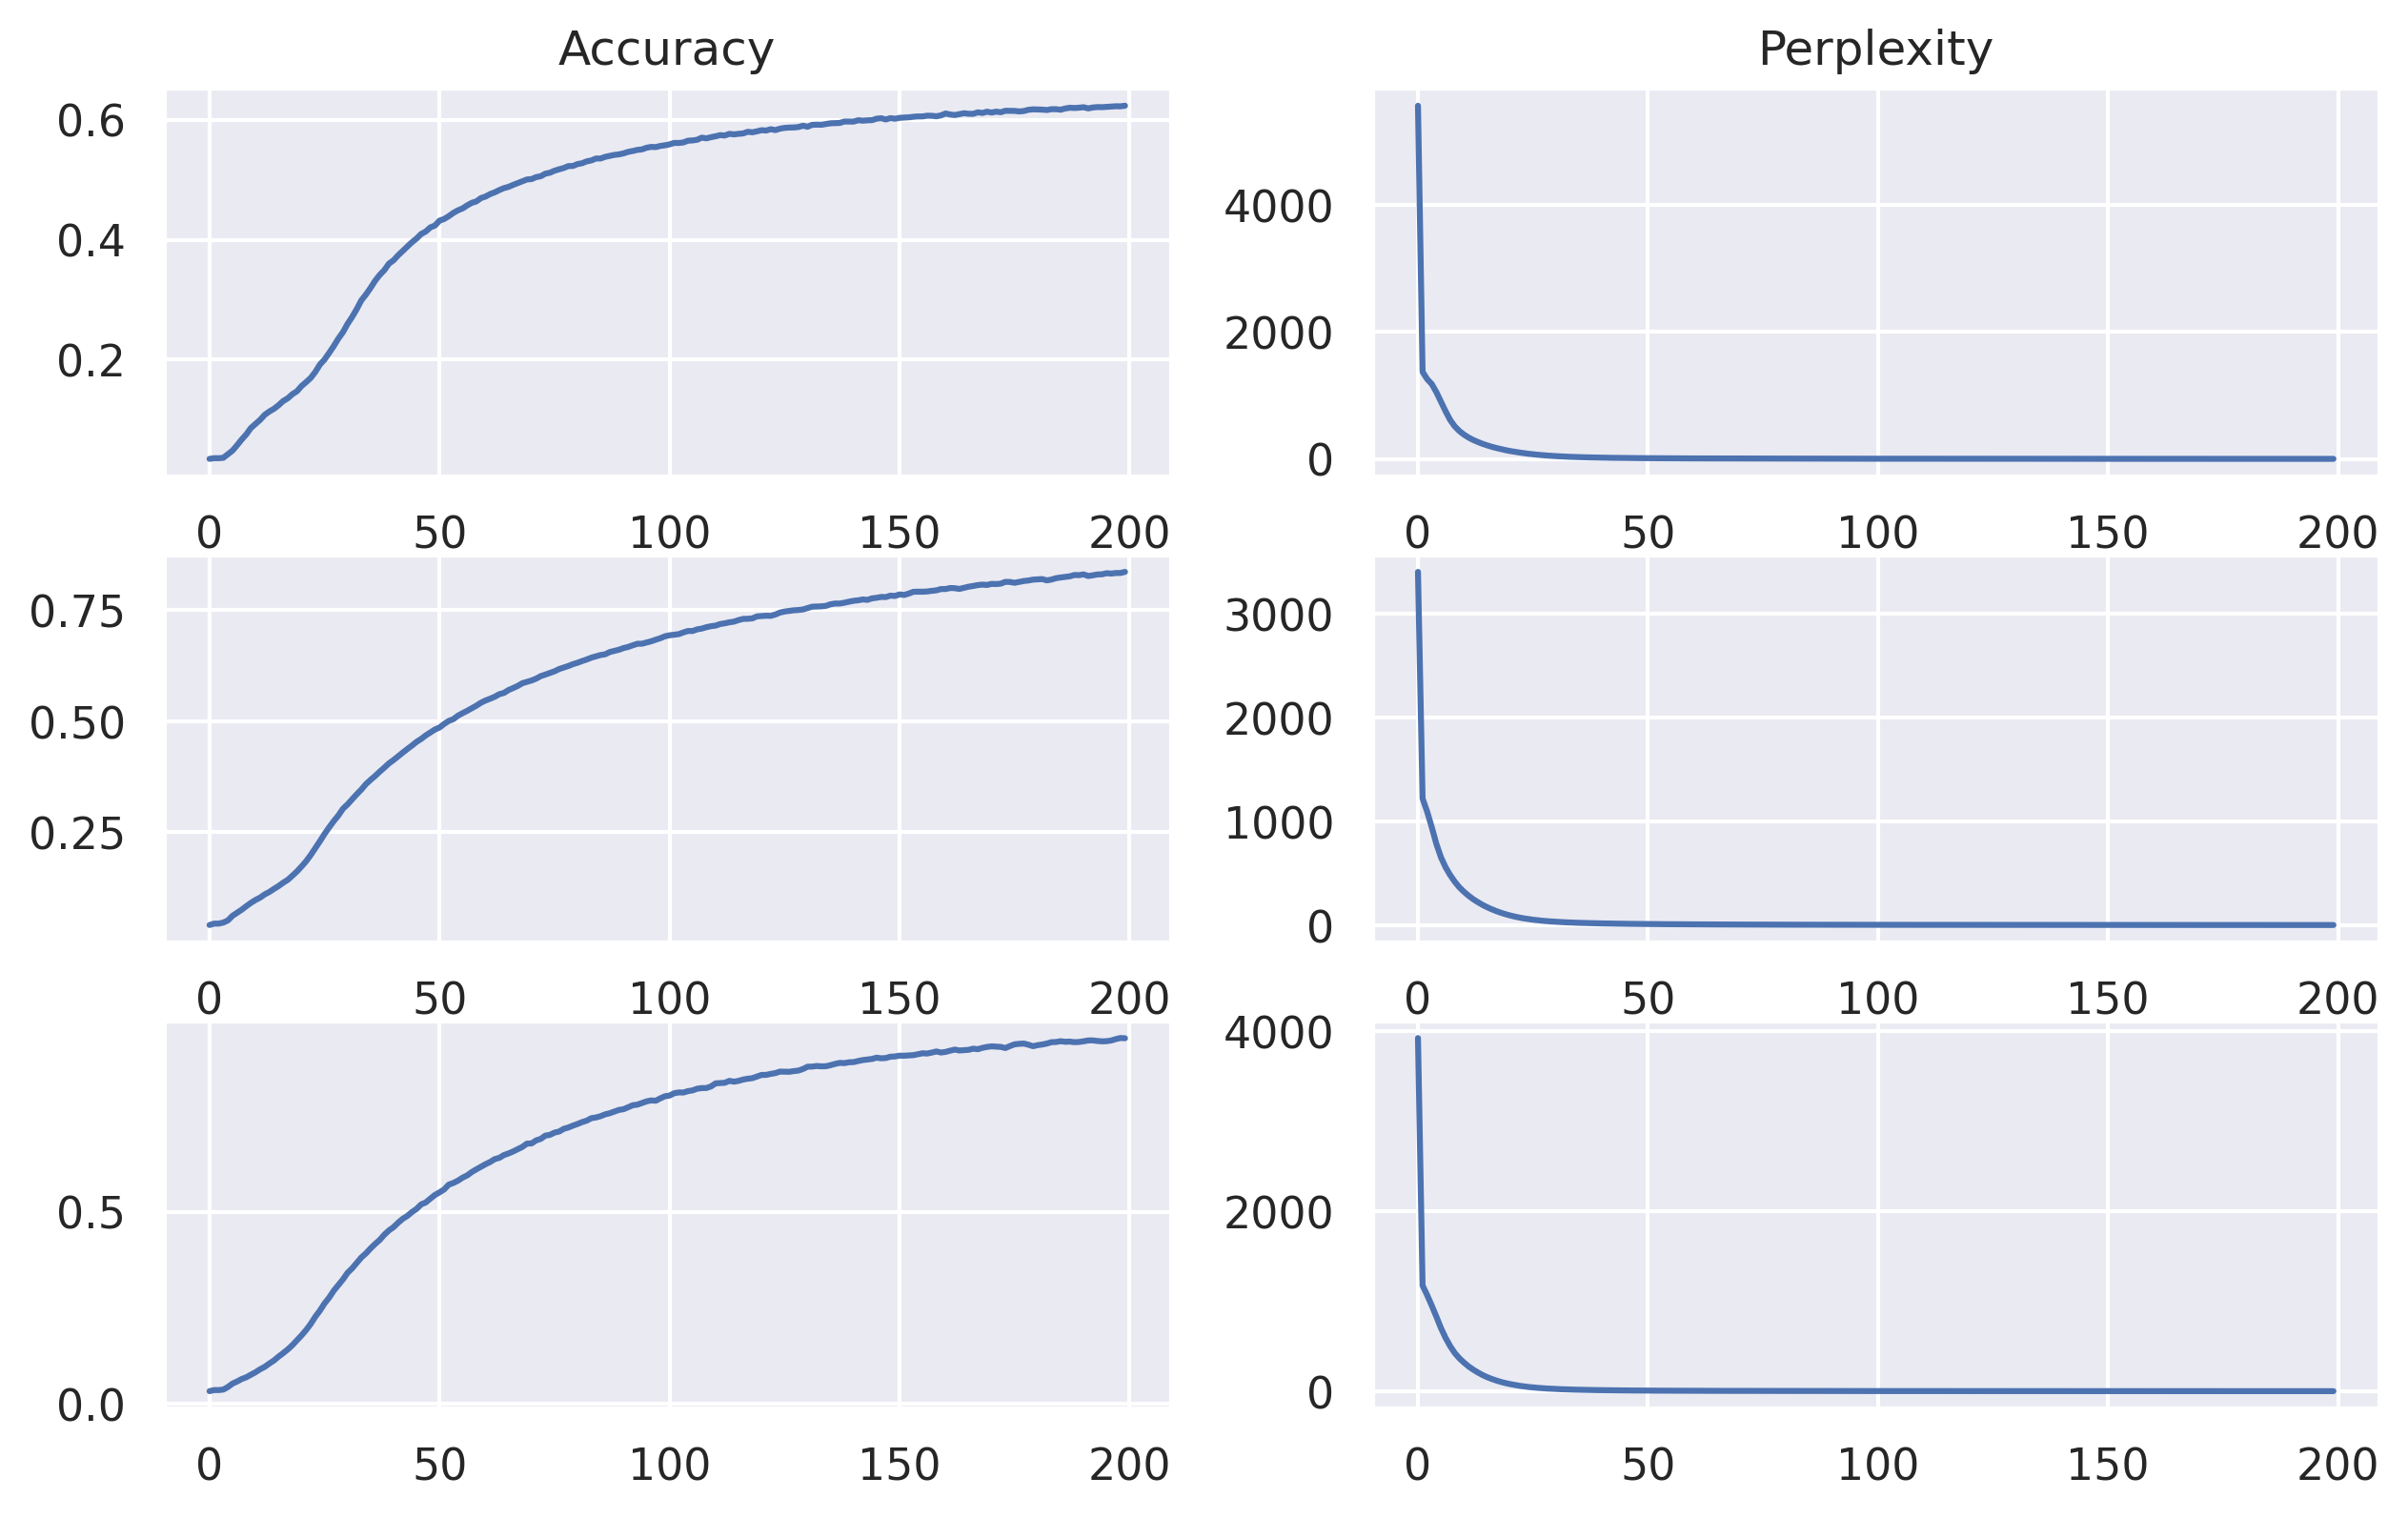

In [64]:
plot_convergence(hist1, hist2, hist3)

In [31]:
hist1.history["loss"]

[8.147360801696777,
 7.214585781097412,
 7.126936435699463,
 7.06364107131958,
 6.94832706451416,
 6.794833183288574,
 6.614894866943359,
 6.4120941162109375,
 6.23347806930542,
 6.080906391143799,
 5.9444146156311035,
 5.81754207611084,
 5.6993937492370605,
 5.586855888366699,
 5.478300094604492,
 5.370472431182861,
 5.263674259185791,
 5.1588873863220215,
 5.053945064544678,
 4.94889497756958,
 4.842048645019531,
 4.740357398986816,
 4.636616230010986,
 4.53041934967041,
 4.426911354064941,
 4.325875759124756,
 4.225401401519775,
 4.129734039306641,
 4.03239631652832,
 3.9391846656799316,
 3.847838878631592,
 3.763221502304077,
 3.678419351577759,
 3.5939393043518066,
 3.5216593742370605,
 3.4465646743774414,
 3.374973773956299,
 3.307624340057373,
 3.247171401977539,
 3.1854605674743652,
 3.132683277130127,
 3.078136682510376,
 3.0280396938323975,
 2.979257822036743,
 2.9341328144073486,
 2.888824701309204,
 2.848310708999634,
 2.8106772899627686,
 2.772099256515503,
 2.737437486648

In [7]:
corpus, _ = poem.get_corpus()
tokenizer = poem.get_tokenizer(corpus)

In [19]:
print(poem.generate_poem(model1, model2, model3, tokenizer, "flames"))

flames danced in
every secular tinge disappears
puzzle said a deep


In [20]:
print(poem.generate_poem(model1, model2, model3, tokenizer, ""))

is anything true ashes
is live out and soul side and
head than to ruin past


In [19]:
print(poem.generate_poem(model1, model2, model3, tokenizer, "sing a"))

sing a song of red
reed fields seed reefs aflutter
in damp soil arranged


In [71]:
print(poem.generate_poem(model1, model2, model3, tokenizer, "you will eat"))

you will eat things there is
in my own thats going today
im wrong in you why


In [14]:
print(poem.generate_poem(model1, model2, model3, tokenizer, "flames"))

flames bright and dancing
eventually become open
infinitely


In [72]:
print(poem.generate_poem(model1, model2, model3, tokenizer, "cold"))

cold winter gnawing
a mother gathers her flock
dreaming songs of spring


In [84]:
print(poem.generate_poem(model1, model2, model3, tokenizer, ""))

streaks of light beckon
infinity set ablaze from
a grand spring full breathes


In [ ]:
print(poem.generate_poem(model1, model2, model3, tokenizer, "cold"))a

In [207]:
def syllable_count(word):
    "source https://stackoverflow.com/questions/46759492/syllable-count-in-python"
    if word.strip() == "":
        return 0
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("e"):
                count -= 1
    if count == 0:
        count += 1
    return count

In [208]:
def generate_poem(model, tokenizer, starter_poem, max_len, length = 20):
    line1 = starter_poem
    while syllable_count(line1) < 5:
        token_list = tokenizer.texts_to_sequences([line1])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        probs = model.predict(token_list, verbose=0)[-1]
        predicted = np.random.choice(len(probs), p=probs)
        # predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        line1 += " " + output_word
    line2 = ""
    while syllable_count(line2) < 7:
        token_list = tokenizer.texts_to_sequences([line1 + line2])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        probs = model.predict(token_list, verbose=0)[-1]
        predicted = np.random.choice(len(probs), p=probs)
        # predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        line2 += " " + output_word
    line3 = ""
    while syllable_count(line3) < 5:
        token_list = tokenizer.texts_to_sequences([line1 + line2 + line3])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        probs = model.predict(token_list, verbose=0)[-1]
        predicted = np.random.choice(len(probs), p=probs)
        # predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        line3 += " " + output_word
    return "\n".join([line1.strip(), line2.strip(), line3.strip()])

In [209]:
import train_model as poem

In [210]:
corpus = poem.get_corpus()

In [211]:
tokenizer = poem.get_tokenizer(corpus)

In [216]:
for _ in range(10):
    print(generate_poem(model, tokenizer, "flames", 25))
    print("------")

flames danced in
her feet like grasping blankets
illuminated
------
flames in its pure back
to waste so close in
your head with you breathing
------
flames danced in
my mark and check it out only
days lets grow and distant
------
flames form humming
absent joke what does your
heart boi kind inside its
------
flames danced in
the dark our conversation
is nice around
------
flames danced in
times in chaos today one lie and
find a date feeling
------
flames danced in
the last day pink cloud in grass
stars a frog cries out
------
flames in darkness
anew currents of iron
outside but too
------
flames danced in
tears and yearn for the scattering
keep the scared world
------
flames danced in
all the days destroyer of haiku
has been shaken with
------


In [225]:
for _ in range(50):
    print(generate_poem(model, tokenizer, "my life is", 25))
    print("------")

my life is found
fills the pain to love and
then i know relax
------
my life is also
his words that that we have moved
on this world come may
------
my life is three coat
i think i love you came on
your face a fun
------
my life is rotten
loved dirt my heart makes
me quite time that
------
my life is my
past spirit will make some ways
across paper sexual
------
my life is alive i
try to get started a spark
of now ill enlist
------
my life is without
her love but i need you
hope the time has
------
my life is a
haiku a cheating porn empty
civilization
------
my life is this
next winds in the sky what do
i like my aphotic
------
my life is like ice six
little do i meet me inside her
i yell until my
------
my life is rotten
or pond work buried life my
name has lost just
------
my life is her
touch fighting him do you one remote and
now guess im meant for
------
my life is not
full of lawyer are you
it your feet explore by
------
my life is the blue leaves
slowly probably it too
soon soon 